In [1]:
# Unsupervised Learning Example: Iris Clustering 
# кластеризация - это методика определения метод исходя из желаемого количества 
# с отсутсвтием еще какого нито представления о том - что это у нас за данные 
# мы будем использовать Gausian mixture model (GMM)

import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split 
import seaborn as sns 
iris = sns.load_dataset("iris")
iris.head()

X_iris = iris.drop("species", axis=1)
y_iris = iris["species"]

# прошлые данные
from sklearn.decomposition import PCA # 1. chose model class 
model = PCA(n_components=2)           # 2. instantiate model 
model.fit(X_iris)                     # 3. fit model of data 
X_2D = model.transform(X_iris)        # 4. tranform the data 
iris["PCA1"] = X_2D[:,0]
iris["PCA2"] = X_2D[:,1]


In [2]:
from sklearn.mixture import GaussianMixture    # 1. choose model class 
model = GaussianMixture(                       # 2. instantiate model
    n_components=3, 
    covariance_type="full"
)
model.fit(X_iris)                              # 3. fit model to data 
y_gmm = model.predict(X_iris)                  # 4. determine labels 

/home/x057/anaconda31/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


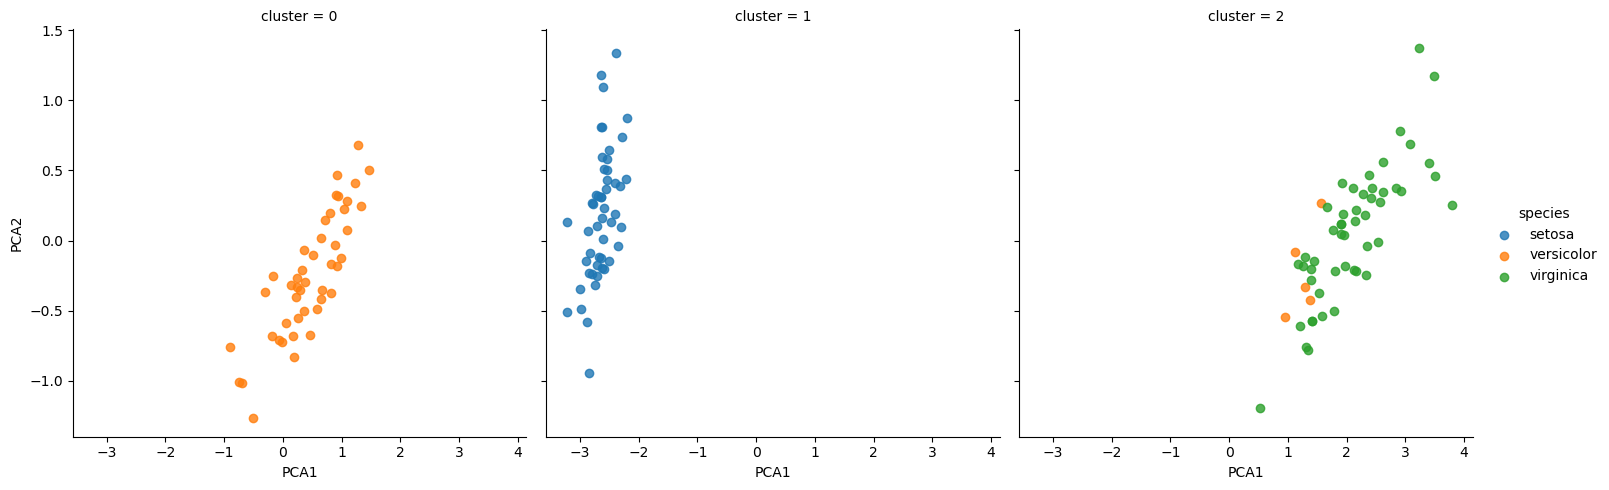

In [3]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
col='cluster', fit_reg=False);